In [1]:
import tensorflow as tf
import cv2 as cv
import sklearn

import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import random

DATASET_FOLDER = r'C:/Users/Gourab Paul/CollegeProject/tomato/train'
HEIGHT = 128
WIDTH = 128
CHANNELS = 3
DEFAULT_IMAGE_SIZE = (WIDTH, HEIGHT)
EPOCHS = 15
BATCH_SIZE = 32

def convert_image_to_array(image_src):
    try:
        image = cv.imread(image_src, cv.IMREAD_COLOR)
        # image = cv.imread(image_src, cv.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv.resize(image, DEFAULT_IMAGE_SIZE)
            # imageMasked = mask_image(image)
            imgToArray = tf.keras.preprocessing.image.img_to_array(image) / 255.0
            # print(imgToArray)
            return imgToArray
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

print("TensorFlow version:", tf.__version__)
print("\nDONE")

TensorFlow version: 2.8.0

DONE


In [2]:
X = []
Y = []
data = []
try:
    print("[INFO] Loading images ...")
    
    dataDir = os.listdir(f"{DATASET_FOLDER}")
    
    for eachDirectory in dataDir:
        # if(eachDirectory=="Health"):
        #     continue
        print(f"[INFO] Processing {eachDirectory} ...")
        plant_disease_image_list = os.listdir(f"{DATASET_FOLDER}/{eachDirectory}/")
        # print(plant_disease_image_list)
        for image in plant_disease_image_list[0:]:
            image_directory = f"{DATASET_FOLDER}/{eachDirectory}/{image}"
            label = eachDirectory
            if image_directory.lower().endswith(".jpg") == True:
                # Converting each image into matrix
                arrayImage = convert_image_to_array(image_directory)
                # Adding the images, then labels to list
                X.append(arrayImage)
                Y.append(label)
                # adding both image and label to data
                data.append([arrayImage, label])
    print("\n[INFO] Image loading completed")
    # print("size", image_list[0].shape)
    
    print("\n[INFO] Total Images: ", len(data))
except Exception as e:
    print(f"Error : {e}")
    
# =================================================================================================
# Shuffle the data to remove bias towards any single sub-dataset
random.shuffle(data)

image_list = []
label_list = []
print(np.shape(data))
for features, labels in data:
    image_list.append(features)  # X is images
    label_list.append(labels)  # Y is labels
images_count = len(X)

image_list_array = np.array(image_list)
label_list_array = np.array(label_list)
print(np.shape(image_list_array))

[INFO] Loading images ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Tomato___Target_Spot ...
[INFO] Processing Tomato___Tomato_mosaic_virus ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...

[INFO] Image loading completed

[INFO] Total Images:  9999
(9999, 2)


C:\Users\Gourab Paul\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(9999, 128, 128, 3)


In [3]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

print(np.shape(image_list))
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list_array)
n_classes = len(label_binarizer.classes_)
print(n_classes)
print(np.shape(label_list))

# ====================================================================================================
print("n_classes: ", np.shape(n_classes))

print("[INFO] Spliting data to train, test")
x_train, x_val, y_train, y_val = train_test_split(
    image_list_array, image_labels, test_size=0.2, random_state=42, shuffle=True
)

print("\nDONE")

(9999, 128, 128, 3)
10
(9999,)
n_classes:  ()
[INFO] Spliting data to train, test

DONE


In [9]:
# ====================================================================================================
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=(HEIGHT, WIDTH, CHANNELS)))

# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"))

# model.add(tf.keras.layers.GlobalAveragePooling2D())

# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation="relu"))

model.add(tf.keras.layers.Dense(128, activation="relu"))

# model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation="softmax"))


# ====================================================================================================
model.summary()
# ====================================================================================================
# distribution
# loss = keras.losses.categorical_crossentropy
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = [tf.keras.metrics.CategoricalAccuracy()],
)
# train the network
print("\nDONE")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 128)     

In [10]:
print("[INFO] training network...")
aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)

history = model.fit(
    aug.flow(x_train, y_train, batch_size=BATCH_SIZE),
    # x = x_train,
    # y = y_train,
    validation_data=(x_val, y_val),
    # validation_split = 0.2,
    epochs = 30,
    # steps_per_epoch=train_ds.samples/train_ds.batch_size,
    # batch_size = BATCH_SIZE,
    # validation_steps=validation_ds.samples/validation_ds.batch_size
)

[INFO] training network...
Epoch 1/30
250/250 [==============================] - 57s 218ms/step - loss: 1.7460 - categorical_accuracy: 0.3583 - val_loss: 1.0480 - val_categorical_accuracy: 0.6235
Epoch 2/30
250/250 [==============================] - 51s 205ms/step - loss: 0.9601 - categorical_accuracy: 0.6535 - val_loss: 0.8194 - val_categorical_accuracy: 0.7160
Epoch 3/30
250/250 [==============================] - 51s 205ms/step - loss: 0.7735 - categorical_accuracy: 0.7247 - val_loss: 0.5795 - val_categorical_accuracy: 0.7855
Epoch 4/30
250/250 [==============================] - 51s 205ms/step - loss: 0.6393 - categorical_accuracy: 0.7737 - val_loss: 1.4775 - val_categorical_accuracy: 0.5805
Epoch 5/30
250/250 [==============================] - 51s 205ms/step - loss: 0.5877 - categorical_accuracy: 0.7908 - val_loss: 0.5430 - val_categorical_accuracy: 0.8045
Epoch 6/30
250/250 [==============================] - 51s 205ms/step - loss: 0.4759 - categorical_accuracy: 0.8336 - val_loss: 0

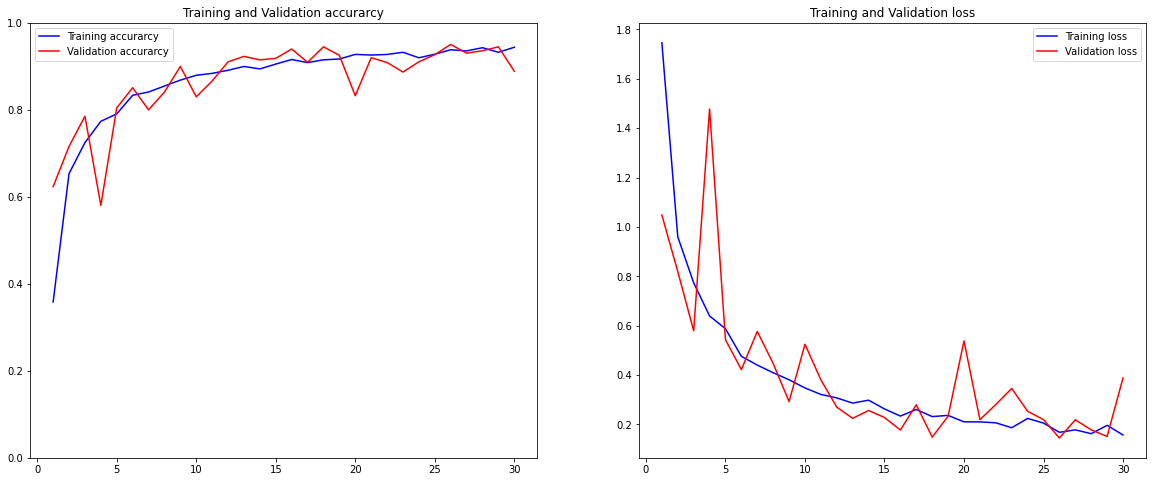

In [11]:
# PLOT THE MODEL
acc = history.history["categorical_accuracy"]
val_acc = history.history["val_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
# Train and validation accuracy
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.ylim((0, 1))
plt.plot(epochs, acc, "b", label="Training accurarcy")
plt.plot(epochs, val_acc, "r", label="Validation accurarcy")
plt.title("Training and Validation accurarcy")
plt.legend()

# Train and validation loss
plt.subplot(1, 2, 2)
# plt.ylim((0, 1))
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()


plt.show()

In [12]:
model.save('tomato_feel_bad_model.h5')